In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from scipy.stats import median_abs_deviation

In [58]:
audio = 'hello.wav'
x, sr = librosa.load(audio, sr=44000)



In [59]:
x

array([ 0.00019271,  0.00020431,  0.00040647, ..., -0.0020666 ,
       -0.00178848,  0.        ], dtype=float32)

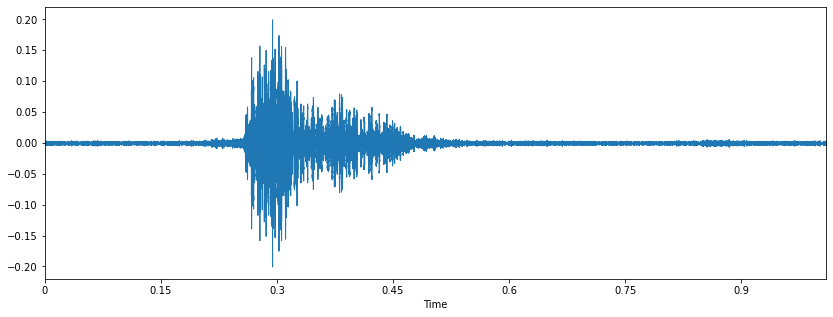

In [60]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr = sr)

In [61]:
x_fft = np.fft.fft(x)

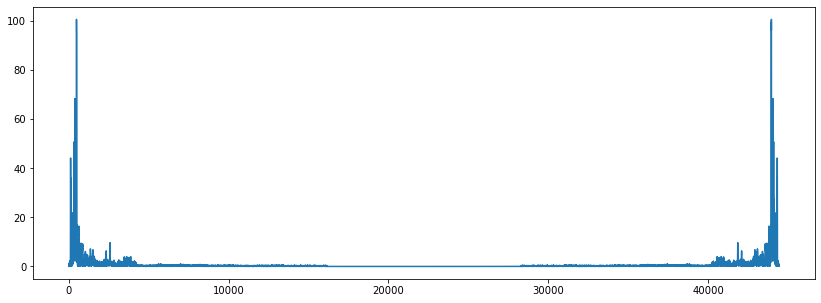

In [62]:
plt.figure(figsize=(14, 5))
plt.plot(np.abs(x_fft))

In [26]:
x_fft_p1 = x_fft[0: int(len(x_fft) / 2)]
x_fft_p2 = x_fft[int(len(x_fft) / 2) + 1: len(x_fft)]
len(x_fft_p1), len(x_fft_p2)

(22218, 22218)

In [27]:
x_fft_p1

array([ 0.02826843-9.43689571e-16j,  0.10401633+6.00634034e-02j,
        0.15637826+6.78859636e-02j, ..., -0.00034141-2.14742357e-05j,
       -0.00037435+1.66358928e-05j, -0.00033841+1.38990185e-05j])

In [30]:
x2_fft_p1 = x2_fft[0: int(len(x2_fft) / 2)]
x2_fft_p1

array([ 2.06064944e-01-2.49800181e-16j, -2.26902478e-01+2.76391721e-01j,
        5.41198164e-02-2.13014264e-01j, ...,
       -1.04011733e-04+4.94767872e-05j, -9.67947337e-05+3.44773996e-06j,
       -1.36519243e-04+1.11630764e-05j])

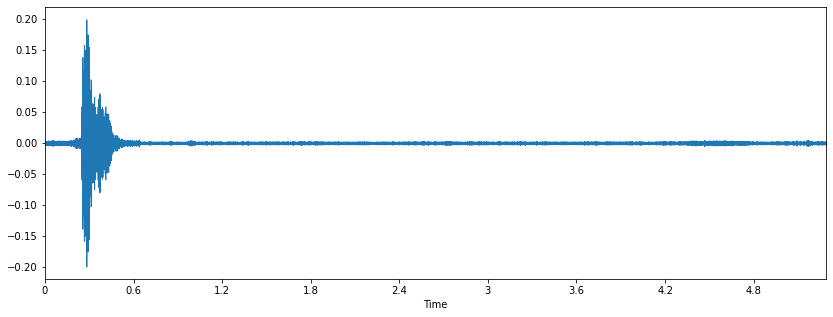

In [37]:
audio3 = 'hello_long.wav'
x3, sr = librosa.load(audio3, sr=44000)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x3, sr = sr)

In [38]:
x3_fft = np.fft.fft(x3)
x3_fft_p1 = x3_fft[0: int(len(x3_fft) / 2)]

In [54]:
np.std(np.abs(x_fft_p1)), np.std(np.abs(x2_fft_p1)), np.std(np.abs(x3_fft_p1)), np.std(np.abs(x4_fft_p1))

(3.9912210775114967, 5.114649507130202, 3.9945867389553853, 5.595408030673855)

In [40]:
np.mean(np.abs(x_fft_p1))

0.7476248772666421

In [35]:
(np.std(np.abs(x2_fft_p1)) - np.std(np.abs(x_fft_p1))) / np.std(np.abs(x2_fft_p1))

0.21964915250840988

In [32]:
np.corrcoef(np.abs(x_fft[0:10000]), np.abs(x2_fft[0:10000]))

array([[1.        , 0.13128178],
       [0.13128178, 1.        ]])

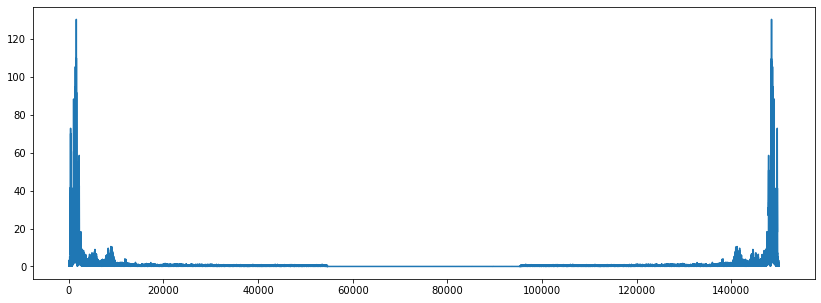

In [17]:
plt.figure(figsize=(14, 5))
plt.plot(np.abs(x2_fft))

In [19]:
len(x2_fft)

150083

In [14]:
audio2 = 'hello_stretch.wav'
x2, sr = librosa.load(audio2, sr=44000)

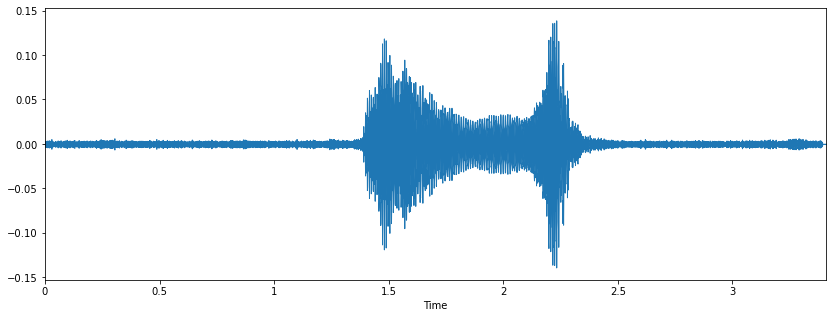

In [15]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr = sr)

In [16]:
x2_fft = np.fft.fft(x2)

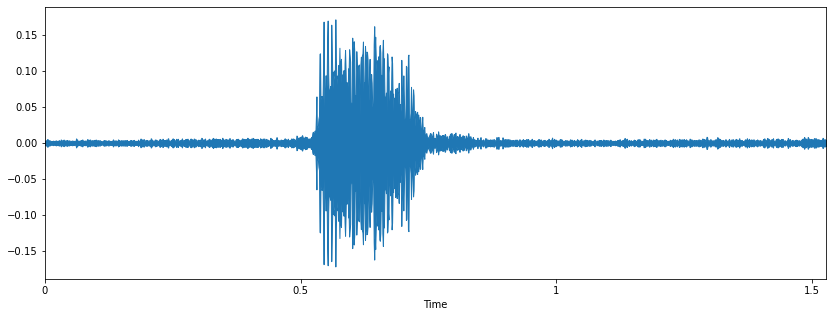

In [49]:
audio4 = "hello_repeat.wav"
x4, sr = librosa.load(audio4, sr = 44000)
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x4[44000:], sr = sr)

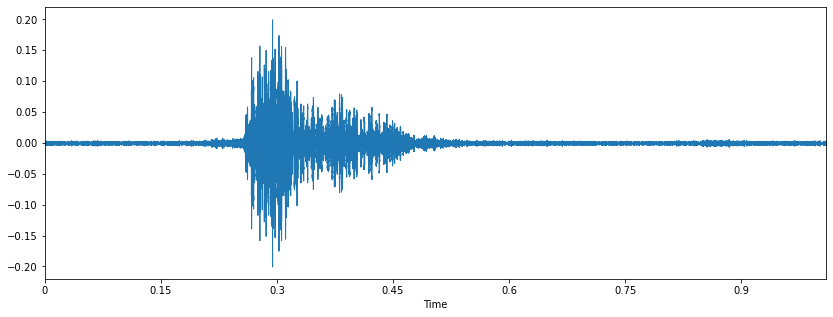

In [65]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr = sr)

In [51]:
x4_fft = np.fft.fft(x4)
x4_fft_p1 = x4_fft[0: int(len(x4_fft) / 2)]

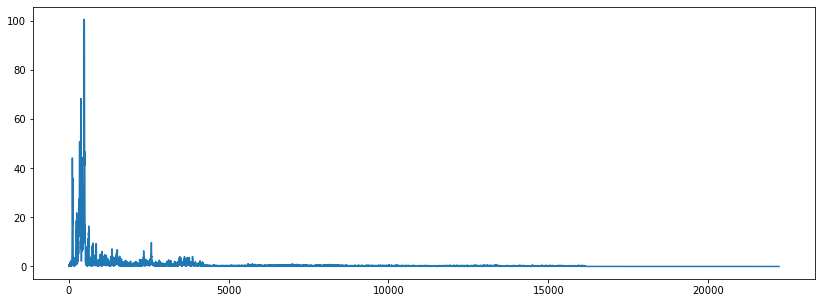

In [67]:
plt.figure(figsize=(14, 5))
plt.plot(np.abs(x_fft_p1))

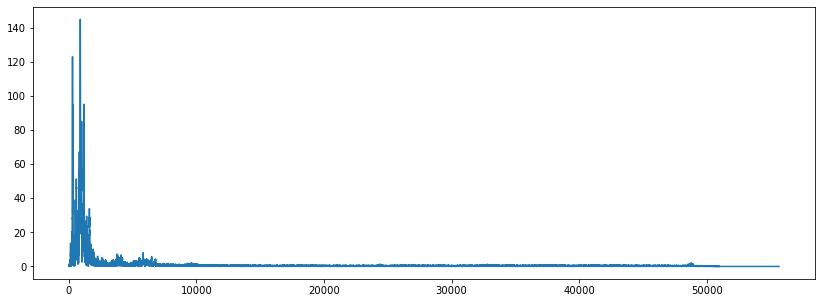

In [68]:
plt.figure(figsize=(14, 5))
plt.plot(np.abs(x4_fft_p1))

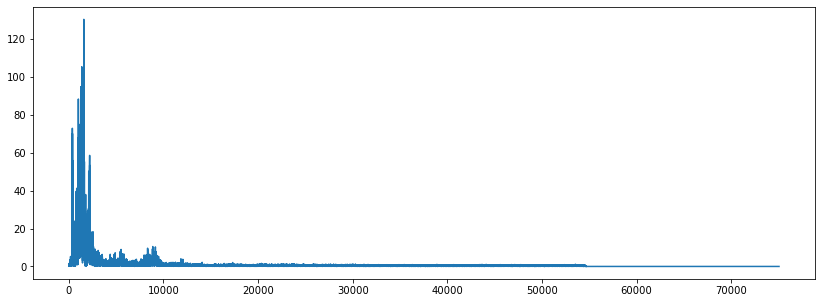

In [69]:
plt.figure(figsize=(14, 5))
plt.plot(np.abs(x2_fft_p1))

In [103]:
n = 10000
x_top = (-np.abs(x_fft_p1)).argsort()[:n]
x2_top = (-np.abs(x2_fft_p1)).argsort()[:n]
x3_top = (-np.abs(x3_fft_p1)).argsort()[:n]
x4_top = (-np.abs(x4_fft_p1)).argsort()[:n]


In [104]:
np.std(x_top), np.std(x2_top), np.std(x3_top), np.std(x4_top)

(4545.730150846747, 6299.675876739611, 6234.293373787262, 12021.234600900842)

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler = MinMaxScaler()
x_top_scaled = scaler.fit_transform(x_top.reshape(-1, 1))
x2_top_scaled = scaler.fit_transform(x2_top.reshape(-1, 1))
x3_top_scaled = scaler.fit_transform(x3_top.reshape(-1, 1))
x4_top_scaled = scaler.fit_transform(x4_top.reshape(-1, 1))

x_top_scaled = x_top_scaled.reshape(1, -1)
x2_top_scaled = x2_top_scaled.reshape(1, -1)
x3_top_scaled = x3_top_scaled.reshape(1, -1)
x4_top_scaled = x4_top_scaled.reshape(1, -1)

In [107]:
x_top_scaled, x2_top_scaled, x3_top_scaled, x4_top_scaled

(array([[0.02947186, 0.02940994, 0.02978144, ..., 0.7811281 , 0.30091016,
         0.29930035]]),
 array([[0.02875119, 0.02884454, 0.02873252, ..., 0.22241099, 0.57005769,
         0.55097735]]),
 array([[0.10936364, 0.11063636, 0.10931818, ..., 0.57122727, 0.92022727,
         0.34227273]]),
 array([[0.0176126 , 0.0176328 , 0.0176732 , ..., 0.13997172, 0.75623106,
         0.72389416]]))

In [108]:
np.std(x_top_scaled), np.std(x2_top_scaled), np.std(x3_top_scaled), np.std(x4_top_scaled)

(0.28145193182135764,
 0.11761245405857797,
 0.28337697153578456,
 0.24280417291255993)